In [29]:
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv("data\healthcare-dataset-stroke-data.csv")

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [31]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [34]:
missing_percentage = data['bmi'].isnull().mean() * 100
print(f"Percentage of missing values in '{'bmi'}': {missing_percentage:.2f}%")

Percentage of missing values in 'bmi': 3.93%


In [35]:
data.bmi.mean(),data.bmi.median()

(28.893236911794666, 28.1)

<Axes: ylabel='Frequency'>

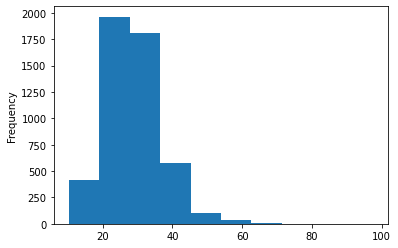

In [36]:
data['bmi'].plot(kind="hist")

<Axes: >

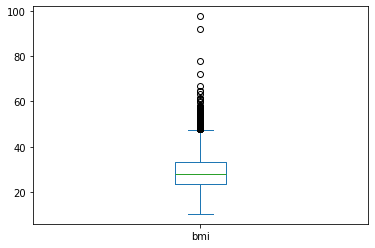

In [37]:
data['bmi'].plot(kind="box")

In [39]:
data['bmi'].isnull().sum()

201

In [40]:
data['bmi'].fillna(data['bmi'].median(),inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [42]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [43]:
data['gender']=data['gender'].apply(lambda x: 0 if x=="Male" else(1 if x=="Female" else 2))

In [44]:
data['ever_married']=data['ever_married'].apply(lambda x: 0 if x=="No" else 1)

In [45]:
data['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [46]:
data['Residence_type']=data['Residence_type'].apply(lambda x: 0 if x=="Urban" else 1)

In [47]:
data_encoded=pd.get_dummies(data,columns=["work_type","smoking_status"],drop_first=True)

In [48]:
data_encoded

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,1,0,0
1,51676,1,61.0,0,0,1,1,202.21,28.1,1,0,0,1,0,0,1,0
2,31112,0,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0
3,60182,1,49.0,0,0,1,0,171.23,34.4,1,0,1,0,0,0,0,1
4,1665,1,79.0,1,0,1,1,174.12,24.0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,80.0,1,0,1,0,83.75,28.1,0,0,1,0,0,0,1,0
5106,44873,1,81.0,0,0,1,0,125.20,40.0,0,0,0,1,0,0,1,0
5107,19723,1,35.0,0,0,1,1,82.99,30.6,0,0,0,1,0,0,1,0
5108,37544,0,51.0,0,0,1,1,166.29,25.6,0,0,1,0,0,1,0,0


In [49]:
data_encoded.drop("id",axis=1,inplace=True)

In [50]:
data_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,1,0,0
1,1,61.0,0,0,1,1,202.21,28.1,1,0,0,1,0,0,1,0
2,0,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0
3,1,49.0,0,0,1,0,171.23,34.4,1,0,1,0,0,0,0,1
4,1,79.0,1,0,1,1,174.12,24.0,1,0,0,1,0,0,1,0


In [51]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          5110 non-null   int64  
 1   age                             5110 non-null   float64
 2   hypertension                    5110 non-null   int64  
 3   heart_disease                   5110 non-null   int64  
 4   ever_married                    5110 non-null   int64  
 5   Residence_type                  5110 non-null   int64  
 6   avg_glucose_level               5110 non-null   float64
 7   bmi                             5110 non-null   float64
 8   stroke                          5110 non-null   int64  
 9   work_type_Never_worked          5110 non-null   uint8  
 10  work_type_Private               5110 non-null   uint8  
 11  work_type_Self-employed         5110 non-null   uint8  
 12  work_type_children              51

In [52]:
numeric_data = data_encoded.select_dtypes(include=['number'])

In [56]:
Q1=numeric_data.quantile(0.25)
Q3=numeric_data.quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR
outliers=(numeric_data>upper_bound)|(numeric_data<lower_bound)
outliers_count=outliers.sum()
print(outliers_count)

gender                              0
age                                 0
hypertension                      498
heart_disease                     276
ever_married                        0
Residence_type                      0
avg_glucose_level                 627
bmi                               126
stroke                            249
work_type_Never_worked             22
work_type_Private                   0
work_type_Self-employed           819
work_type_children                687
smoking_status_formerly smoked    885
smoking_status_never smoked         0
smoking_status_smokes             789
dtype: int64
